![example](./images/banner-949931_1280.jpg)

# Movie Analysis for Microsoft Studios

**Authors**: [Paul Lindquist](https://www.linkedin.com/in/paul-lindquist/), [Steven Addison](https://www.linkedin.com/in/addisonse/), [Sumedh Bhardwaj](https://www.linkedin.com/in/sumedh-bhardwaj-932767202/), [Wahaj Dar](https://www.linkedin.com/in/wahaj-dar-/)

# Overview
***
This project postulates that Microsoft is launching a movie studio. We use exploratory data analysis to pitch recommendations to their stakeholders.

# Business Problem
***
As this is a new venture for Microsoft, we want to be cognizant of cost and profitability. We offer several, data-driven approaches to maximize return.

Questions we'll answer:
* What genres of movies are lower risk to target as an entry point into the industry?
* Are there types of movies or specific directors and actors that yield higher revenues?
* Who are Microsoft's competitors and can anything be modeled from their successes?
    * Does Microsoft have a catalogue of such content at their disposal?
* When is the most profitable time to release movies?

# Data
***
We use historical and categorical data from the box office and current movie landscape – release date, directors, actors, etc. – to examine correlations.

Focuses:
* Particular focus given to cost (budget) and gross revenue (worldwide)
* Drawing a correlation between revenue and genres, directors, actors, release date, etc.
* Sourced from: [Box Office Mojo](https://www.boxofficemojo.com/), [The Numbers](https://www.the-numbers.com/), [IMDB](https://www.imdb.com/)

## Topic 1: Entry Point Movies
Since Microsoft is starting a new venture, we want to be cognizant of cost and profit. We take a look at a dataset of the top 50 movies with the highest profit margins over the last 20 years. And interestingly, 23 of the top 50 are horror movies. Perhaps this genre could be a lower-risk entry point into the movie industry?
***

### 1.1 Data Import
Using a table that highlights both cost ('production budget') and revenue ('worldwide gross').

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Open DataFrame highlighting production budget and worldwide gross revenue
b_and_p = pd.read_csv('./data/zippedData/tn.movie_budgets.csv.gz')

### 1.2 Data Cleaning and Filtering
The 'gross revenue' and 'production budget' columns need to be changed to integers to run calculations. We then run a simple '(revenue - budget) / revenue' calculation to create a sortable 'profit margin' column. Finally, we create a 'top 50' list of movies sorted by 'profit margin' with corresponding genres.

In [3]:
# Convert string columns to integers and date-time columns
# Strip dollar signs and commas from integers
b_and_p['worldwide_gross'] = b_and_p['worldwide_gross'].str.replace(',', 
                                '').str.replace('$', '').astype(int)
b_and_p['production_budget'] = b_and_p['production_budget'].str.replace(',', 
                                '').str.replace('$', '').astype(int)
b_and_p['domestic_gross'] = b_and_p['domestic_gross'].str.replace(',', 
                                '').str.replace('$', '').astype(int)
b_and_p['release_date'] = pd.to_datetime(b_and_p['release_date'])
b_and_p.dropna(subset=['production_budget', 'worldwide_gross'])
b_and_p.at[5189, 'movie'] = "God's Not Dead"
b_and_p.at[2996, 'movie'] = "The King's Speech"

In [4]:
# Filter by movies that grossed at least $1M worldwide and were made in the last 20 years
# Create a gross profit margin column and sort by it
b_and_p = b_and_p[b_and_p['worldwide_gross'] >= 1000000]
b_and_p = b_and_p[b_and_p['release_date'].dt.year >= 1999]
b_and_p['profit_margin_percent'] = (b_and_p['worldwide_gross'] - b_and_p['production_budget']) / b_and_p['worldwide_gross'] * 100
b_and_p['gross_margin_percent'] = b_and_p['worldwide_gross'] / b_and_p['production_budget'] * 100
b_and_p = b_and_p.sort_values(by=['gross_margin_percent'], ascending=False).reset_index(drop=True)

In [5]:
# Create a Top 50 list and hardcode genre/sorted genre for each movie
pd.options.mode.chained_assignment = None
top_50_genres = b_and_p.iloc[:50]
top_50_genres['genre'] = ['Horror', 'Horror', 'Horror', 'Documentary', 'Musical', 'Comedy', 'Thriller',
                    'Christian', 'Horror', 'Documentary', 'Horror', 'Comedy', 'Christian',
                    'Horror', 'Horror', 'Horror', 'Thriller', 'Christian', 'Documentary', 'Horror',
                    'Romance', 'Foreign', 'Drama', 'Horror', 'Horror', 'Foreign', 'Horror',
                    'Documentary', 'Horror', 'Documentary', 'Comedy', 'Horror', 'Foreign', 'Horror',
                    'Foreign', 'Horror', 'Horror', 'Drama', 'Horror', 'Drama', 'Horror', 'Drama',
                    'Drama', 'Horror', 'Horror', 'Horror', 'Documentary', 'Comedy', 'Drama',
                    'Horror']

top_50_genres['genre_sorted'] = ['Horror', 'Horror', 'Horror', 'Horror', 'Horror', 'Horror', 'Horror',
                          'Horror', 'Horror', 'Horror', 'Horror', 'Horror', 'Horror', 'Horror',
                          'Horror', 'Horror', 'Horror', 'Horror', 'Horror', 'Horror', 'Horror', 'Horror',
                          'Horror', 'Documentary', 'Documentary', 'Documentary', 'Documentary',
                          'Documentary', 'Documentary', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama',
                          'Drama', 'Foreign', 'Foreign', 'Foreign', 'Foreign', 'Comedy', 'Comedy',
                          'Comedy', 'Comedy', 'Christian', 'Christian', 'Christian', 'Thriller',
                          'Thriller', 'Musical', 'Romance']

top_50_genres

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,gross_margin_percent,genre,genre_sorted
0,93,2009-09-25,Paranormal Activity,450000,107918810,194183034,99.768260,43151.785333,Horror,Horror
1,80,2015-07-10,The Gallows,100000,22764410,41656474,99.759941,41656.474000,Horror,Horror
2,7,1999-07-14,The Blair Witch Project,600000,140539099,248300000,99.758357,41383.333333,Horror,Horror
3,10,2004-05-07,Super Size Me,65000,11529368,22233808,99.707652,34205.858462,Documentary,Horror
4,57,2007-05-16,Once,150000,9445857,23323631,99.356875,15549.087333,Musical,Horror
5,8,2004-06-11,Napoleon Dynamite,400000,44540956,46122713,99.132748,11530.678250,Comedy,Horror
6,31,2004-08-06,Open Water,500000,30500882,55518641,99.099402,11103.728200,Thriller,Horror
7,81,2006-09-29,Facing the Giants,100000,10178331,10243159,99.023739,10243.159000,Christian,Horror
8,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,99.017291,10175.949000,Horror,Horror
9,60,2009-04-23,Home,500000,15433,44793168,98.883758,8958.633600,Documentary,Horror


### 1.3 Data Analysis and Calculations
We merge our previous table with another table that has more movies and corresponding genres to create a larger dataset of movies. Then we filter down to a table of single genres and run averages on the budgets and gross revenues. We run another calculation to get return on investment (ROI) variables.

In [6]:
# Filter tables by genre, create averages for budget, revenue & ROI
genre_data = pd.read_csv('./data/zippedData/imdb.title.basics.csv.gz')
gross_genre_merge = b_and_p.merge(genre_data, left_on=['movie'], right_on=['primary_title'])
gross_genre_merge['genres'] = gross_genre_merge['genres'].str.replace(',', '')

horror_genre = gross_genre_merge[gross_genre_merge['genres'].str.contains("orro")==True]
horror_genre = horror_genre.drop_duplicates(subset=['movie'])
horror_budg = horror_genre['production_budget'].mean()
horror_rev = horror_genre['worldwide_gross'].mean()

drama_genre = gross_genre_merge[gross_genre_merge['genres'].str.contains("rama")==True]
drama_genre = drama_genre.drop_duplicates(subset=['movie'])
drama_budg = drama_genre['production_budget'].mean()
drama_rev = drama_genre['worldwide_gross'].mean()

comedy_genre = gross_genre_merge[gross_genre_merge['genres'].str.contains("omedy")==True]
comedy_genre = comedy_genre.drop_duplicates(subset=['movie'])
comedy_budg = comedy_genre['production_budget'].mean()
comedy_rev = comedy_genre['worldwide_gross'].mean()

action_genre = gross_genre_merge[gross_genre_merge['genres'].str.contains("ction")==True]
action_genre = action_genre.drop_duplicates(subset=['movie'])
action_budg = action_genre['production_budget'].mean()
action_rev = action_genre['worldwide_gross'].mean()

horror_roi = ((horror_rev - horror_budg) / horror_budg) * 100
drama_roi = ((drama_rev - drama_budg) / drama_budg) * 100
comedy_roi = ((comedy_rev - comedy_budg) / comedy_budg) * 100
action_roi = ((action_rev - action_budg) / action_budg) * 100

print(f"Avg Horror ROI: {horror_roi}, Avg Horror Budget: {horror_budg}, Avg: Horror Revenue: {horror_rev}")
print(f"Avg Drama ROI: {drama_roi}, Avg Drama Budget: {drama_budg}, Avg: Drama Revenue: {drama_rev}")
print(f"Avg Comedy ROI: {comedy_roi}, Avg Comedy Budget: {comedy_budg}, Avg: Comedy Revenue: {comedy_rev}")
print(f"Avg Action ROI: {action_roi}, Avg Action Budget: {action_budg}, Avg: Action Revenue: {action_rev}")

Avg Horror ROI: 275.2021771150655, Avg Horror Budget: 24778529.497854076, Avg: Horror Revenue: 92969582.13304721
Avg Drama ROI: 175.83723648853314, Avg Drama Budget: 29679766.655398037, Avg: Drama Revenue: 81867848.13849509
Avg Comedy ROI: 222.8918060657137, Avg Comedy Budget: 41848300.76173913, Avg: Comedy Revenue: 135124734.1373913
Avg Action ROI: 198.34461443240613, Avg Action Budget: 76802216.18962076, Avg: Action Revenue: 229135275.76646706


### 1.4 Data Visualization
We plot a bar chart to compare the genre subgroups against each other. A second bar chart compares each genre's cost (budget), revenue and ROI.

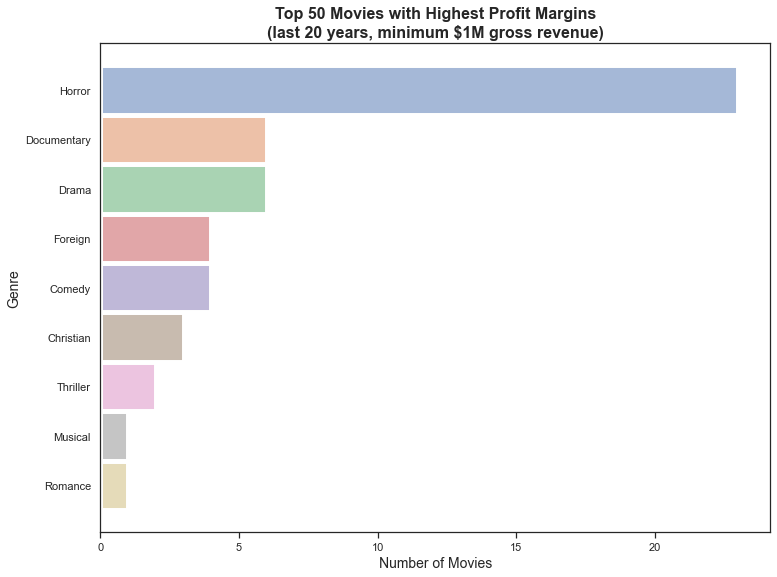

In [75]:
# Plot histogram highlighting Top 50 movies w/ highest GM by genre
genre_hist = sns.histplot(data=top_50_genres, y='genre_sorted', hue="genre_sorted", legend=False)
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style('white')
plt.rcParams['xtick.bottom'] = True
plt.xlabel('Number of Movies', size=14)
plt.ylabel('Genre', size=14)
plt.title('Top 50 Movies with Highest Profit Margins\n(last 20 years, minimum $1M gross revenue)',
         size=16, weight=900);

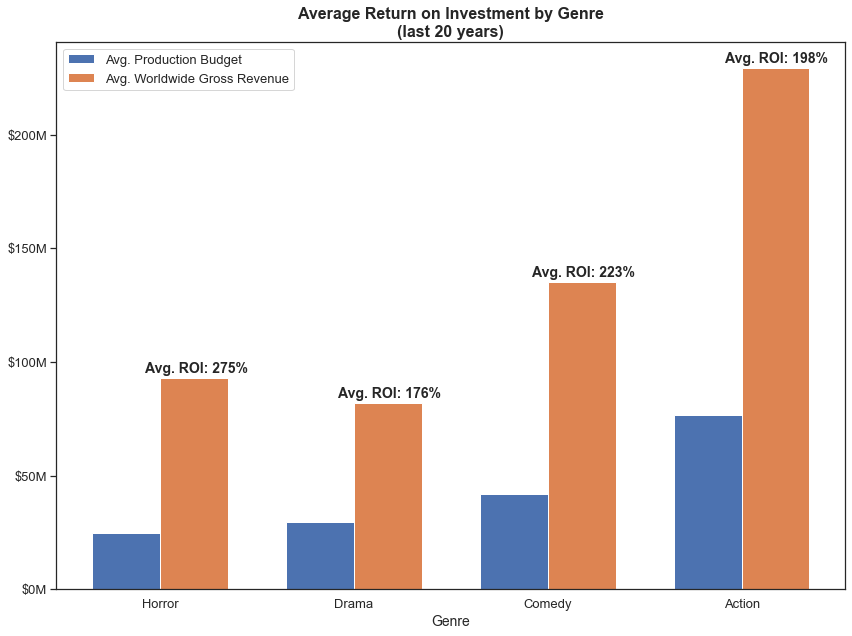

In [77]:
# Plot bar graph with avg. budget, revenue and ROI by genre

from matplotlib.ticker import FuncFormatter

all_labels = ['Horror', 'Drama', 'Comedy', 'Action']
prod_budg = [horror_budg, drama_budg, comedy_budg, action_budg]
all_revs = [horror_rev, drama_rev, comedy_rev, action_rev]
horror_roi = 'Avg. ROI: 275%'
comedy_roi = 'Avg. ROI: 223%'
drama_roi = 'Avg. ROI: 176%'
action_roi = 'Avg. ROI: 198%'

x_paul = np.arange(len(all_labels))
width_paul = 0.35
y_paul = np.arange(4)
def millions(x, pos):
    return '$%1.0fM' % (x*1e-6)
formatter = FuncFormatter(millions)

cost_rev, ax = plt.subplots()
rects1_paul = ax.bar(x_paul - width_paul/2, prod_budg, width_paul, label='Avg. Production Budget')
rects2_paul = ax.bar(x_paul + width_paul/2, all_revs, width_paul, label='Avg. Worldwide Gross Revenue')

ax.set_xlabel('Genre', size=14)
ax.set_title('Average Return on Investment by Genre\n(last 20 years)', size=16, weight=900)
ax.set_xticks(x_paul)
ax.set_xticklabels(all_labels, size=13)
ax.tick_params(left=True, bottom=False)
ax.legend()
plt.rc('legend', fontsize=13)
ax.yaxis.set_major_formatter(formatter)
plt.yticks(fontsize=13)

plt.figtext(0.174, 0.415, horror_roi, fontsize=14, weight="bold")
plt.figtext(0.398, 0.377, drama_roi, fontsize=14, weight="bold")
plt.figtext(0.622, 0.563, comedy_roi, fontsize=14, weight="bold")
plt.figtext(0.846, 0.894, action_roi, fontsize=14, weight="bold")

cost_rev.tight_layout();

### 1.5 Recommendation

**An early focus should be placed on making horror movies.** According to the data, they historically yield the lowest average cost and highest average profit margins. They'll serve as an initial, lower-risk entry point.

## Topic 2: Action Genre Profit Analysis 
As we saw in the above section, despite not having the best return on investment, action movies bring in undeniably impressive profits. In this section we will take a closer look at the highest profiting action movies and deliver Microsoft Studios suggestions on directors and cast members to hire so that they know they are investing in the most valuable names in Hollywood.
***

### 2.1 Data Import

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 2.2 Data Cleaning and Filtering 

The data we used to find our conclusion came from several data sets acquired from IMDB that had to be merged together to tell a cohesive story. We also used the data set provided from the website “The Numbers” to draw conclusions based on net profits. 

The biggest hurdle was cleaning up the money data in the “budget” dataframe so that we could sort it by total profits. After removing all commas and dollar signs from the dataframe we were able to then subtract every movie’s world wide gross figure from their budget to then find out the movie’s profit. From that point it was a painless process to merge that large dataframe with genre information taken from IMDB and find the most profitable action movies of the past twenty years.



In [10]:
namesdf = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
titlesdf = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
crewdf = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
principalsdf = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
budgetdf = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

In [11]:
# Select the genres from the title dataframe so that we make explore by action movies only 
# Removed the commas and dollar signs from the data so that it could be converted
# Reassigned the data to a float type instead of object so that it may be sorted properly
# Assinged that now to an int so that it is easier to read
# Since I'm on a PC for some reason I cannot just convert to int
# Only selected the movies from the past 20 years
# Established a column for net gross by subtracting the budget from the worldwide gross
# Merged in my genres so that I may only select action movies
# Selected the top 20 grossing action movies from the past 20 years
genres = titlesdf[['primary_title', 'genres']]
budgetdf.replace(',','', regex=True, inplace=True)
budgetdf.replace('\$','', regex=True, inplace=True)
budgetdf['production_budget'] = budgetdf['production_budget'].astype(float)
budgetdf['worldwide_gross'] = budgetdf['worldwide_gross'].astype(float)
budgetdf['domestic_gross'] = budgetdf['domestic_gross'].astype(float)
budgetdf['production_budget'] = budgetdf['production_budget'].astype(int)
budgetdf['worldwide_gross'] = budgetdf['worldwide_gross'].astype(int)
budgetdf['domestic_gross'] = budgetdf['domestic_gross'].astype(int)
budgetdf['release_date'] = pd.to_datetime(budgetdf['release_date'])
budgetdf = budgetdf[budgetdf['release_date'].dt.year >= 2001]
budgetdf['total_profit'] = budgetdf['worldwide_gross'] - budgetdf['production_budget']
budgetandgenres = budgetdf.merge(genres, left_on=['movie'], right_on=['primary_title'])
actiondf = budgetandgenres[budgetandgenres['genres'].str.contains('Action') == True]
highestactiondf = actiondf.sort_values(by='total_profit', ascending=False)
highest20df = highestactiondf.head(20)

In [12]:
highest20df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,primary_title,genres
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
24,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,1433854864,Jurassic World,"Action,Adventure,Sci-Fi"
58,67,2015-04-03,Furious 7,190000000,353007020,1518722794,1328722794,Furious 7,"Action,Crime,Thriller"
19,27,2012-05-04,The Avengers,225000000,623279547,1517935897,1292935897,The Avengers,"Action,Adventure,Sci-Fi"
38,42,2018-02-16,Black Panther,200000000,700059566,1348258224,1148258224,Black Panther,"Action,Adventure,Sci-Fi"
102,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi"
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi"
39,44,2018-06-15,Incredibles 2,200000000,608581744,1242520711,1042520711,Incredibles 2,"Action,Adventure,Animation"
43,48,2013-05-03,Iron Man 3,200000000,408992272,1215392272,1015392272,Iron Man 3,"Action,Adventure,Sci-Fi"
124,36,2018-12-21,Aquaman,160000000,335061807,1146894640,986894640,Aquaman,"Action,Adventure,Fantasy"


### 2.3 Data Analysis and Calculations

From this point we wanted to see who are the cast and crew responsible for these action blockbusters. 

To do so we took the IMDB databases and prepared them to be merged together; databases having the names of the crew, titles of the movies they worked on, and job they performed. Once those were created and combined we were able to merge them with the database we made above showcasing all of the action movies, sorted once again by most profitable.

We focused on three key players to see who are involved with making these huge films.
Firstly we dove into the directors. We did some more minor cleaning so that the Russo Brothers would be treated as a pair instead of individuals since all of their data was identical. We then took my newly formed most profitable directors information and grouped them by the total profits of movies they have made. To make the data a bit less overwhelming we only selected the top 10 to visualize. 

We then repeated this process for actors and actresses, and now the top 10 most profitable directors, actors, and actresses are ready to be visualized. 

In [13]:
# Grab the relevant data in a new dataframe
names = namesdf[['nconst','primary_name']]
# Do the same for the rest of the databases that are intended to be merged
movietitles = titlesdf[['tconst','primary_title']]
crew = principalsdf[['tconst','nconst','category']]
# Merge the names dataframe to principals
crewnames = names.merge(crew, on=['nconst'])
# Merge the titles 
namesandtitles = crewnames.merge(movietitles, on=['tconst'])
# Merge all that to the top profiting action movies dataframe
grosscrew = namesandtitles.merge(highestactiondf, left_on=['primary_title'], right_on=['movie'])
# Copy the dataframe into a new dataframe sorted by the highest total profit
highestgrosscrew = grosscrew.sort_values(by='total_profit', ascending=False)

In [14]:
highestgrosscrew

,nconst,primary_name,tconst,category,primary_title_x,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,primary_title_y,genres
3735,nm1165110,Chris Hemsworth,tt4154756,actor,Avengers: Infinity War,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
3732,nm0751648,Joe Russo,tt4154756,director,Avengers: Infinity War,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
3734,nm0749263,Mark Ruffalo,tt4154756,actor,Avengers: Infinity War,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
3736,nm0751577,Anthony Russo,tt4154756,director,Avengers: Infinity War,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
3737,nm0262635,Chris Evans,tt4154756,actor,Avengers: Infinity War,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9857,nm0126208,John Byrne,tt6565702,writer,Dark Phoenix,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,Dark Phoenix,"Action,Adventure,Sci-Fi"
9858,nm1055413,Michael Fassbender,tt6565702,actor,Dark Phoenix,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,Dark Phoenix,"Action,Adventure,Sci-Fi"
9859,nm2225369,Jennifer Lawrence,tt6565702,actress,Dark Phoenix,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,Dark Phoenix,"Action,Adventure,Sci-Fi"
9860,nm1334526,Simon Kinberg,tt6565702,director,Dark Phoenix,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,Dark Phoenix,"Action,Adventure,Sci-Fi"


In [15]:
# Ceated a dataframe for all of the directors in crew dataframe
directors = highestgrosscrew.loc[highestgrosscrew['category'] == 'director']
# We want to treat the Russo Brothers as one since their data is the same and they work as a pair
# Rename them as The Russo Brothers in dataframe and drop the name and title constant columns so that dup value can be dropped
directors.replace('Joe Russo','The Russo Brothers', regex=True, inplace=True)
directors.replace('Anthony Russo','The Russo Brothers', regex=True, inplace=True)
directors = directors.drop(['nconst', 'tconst'], axis=1)
directors = directors.drop_duplicates()
# Group the directors by the sum of their movie's total profit
directorgb = directors.groupby(['primary_name']).sum().sort_values(['total_profit'], ascending=False)
# Select the top 10 profitable directors
top10directors = directorgb.head(10)

In [16]:
top10directors

,id,production_budget,domestic_gross,worldwide_gross,total_profit
primary_name,,,,,
The Russo Brothers,40,720000000,1346646789,3902605502,3182605502
Joss Whedon,31,555600000,1082285415,2920949860,2365349860
James Wan,103,350000000,688068827,2665617434,2315617434
Michael Bay,167,648000000,777873593,2911998250,2263998250
Francis Lawrence,191,484000000,1090402339,2426381826,1942381826
Christopher Nolan,118,585000000,930783574,2419801109,1834801109
Sam Mendes,62,500000000,504434452,1990147904,1490147904
Zack Snyder,208,950000000,942497822,2420920114,1470920114
Colin Trevorrow,34,215000000,652270625,1648854864,1433854864


In [17]:
# Repeat the process for Actors and Actresses
actors = highestgrosscrew.loc[highestgrosscrew['category'] == 'actor']
actorgb = actors.groupby(['primary_name']).sum().sort_values(['total_profit'], ascending=False)
top10actors = actorgb.head(10)
actresses = highestgrosscrew.loc[highestgrosscrew['category'] == 'actress']
actressesgb = actresses.groupby(['primary_name']).sum().sort_values(['total_profit'], ascending=False)
top10actresses = actressesgb.head(10)

In [18]:
top10actors

,id,production_budget,domestic_gross,worldwide_gross,total_profit
primary_name,,,,,
Robert Downey Jr.,286,1775600000,3411660407,9361531927,7585931927
Chris Evans,152,1480600000,2633741170,7312058858,5831458858
Dwayne Johnson,830,1504850000,2118570005,7041969100,5537119100
Chris Hemsworth,545,1736600000,2176057640,6221281586,4484681586
Vin Diesel,348,938000000,1236266430,4725216060,3787216060
Mark Ruffalo,159,900600000,1517955179,4626453194,3725853194
Chris Pratt,160,705000000,1754379870,4345749723,3640749723
Jason Statham,715,1095500000,997028581,4171967832,3076467832
Liam Hemsworth,291,760000000,1639711004,3654502024,2894502024


In [19]:
top10actresses

,id,production_budget,domestic_gross,worldwide_gross,total_profit
primary_name,,,,,
Scarlett Johansson,183,795000000,1458248371,3997825665,3202825665
Jennifer Lawrence,367,1252000000,1843026175,4152013406,2900013406
Bryce Dallas Howard,47,385000000,1069990385,2954627663,2569627663
Cate Blanchett,443,1720000000,1238359236,3674994059,1954994059
Angelina Jolie,304,700000000,736127535,2510355287,1810355287
Emma Stone,117,615000000,698053924,2144055931,1529055931
Gwyneth Paltrow,182,490000000,804779834,2004496389,1514496389
Brie Larson,326,437000000,768506745,1929457808,1492457808
Judy Greer,34,215000000,652270625,1648854864,1433854864


### 2.4 Data Visualization
For these visuals, we wanted to keep them easy to read, concise and on brand. The visual inspiration came from Microsoft’s logo, taking the hexcode value of the four squares seen in their branding and using them as the colors for the four graphs. We really showcase the large profits these creatives are generating.

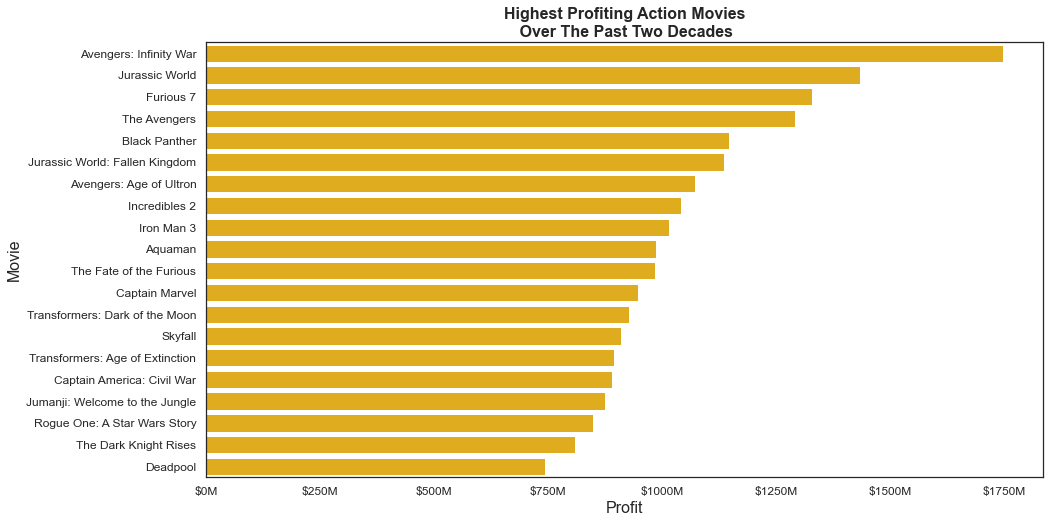

In [78]:
from matplotlib.ticker import FuncFormatter
def millions(y, pos):
    return '$%1.0fM' % (y*1e-6)
sns.set_theme(style="white", palette=None)
stevenmoviefig, ax = plt.subplots(figsize=(15,8))
sns.barplot(y = highest20df['movie'], x = highest20df['total_profit'], color='#ffbb00')

ax.set_title('Highest Profiting Action Movies\n Over The Past Two Decades', fontsize= 16, weight=900)
ax.set_xlabel('Profit', fontsize= 16)
ax.set_ylabel('Movie', fontsize= 16)
formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

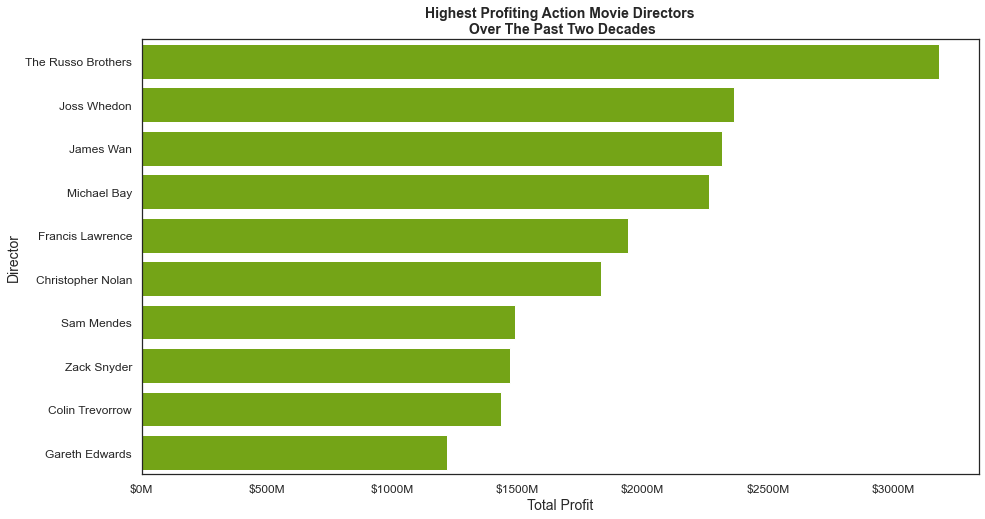

In [79]:
stevendirectorfig, ax = plt.subplots(figsize=(15,8))
sns.barplot(y = top10directors.index, x = top10directors['total_profit'], color='#7cbb00')

ax.set_title('Highest Profiting Action Movie Directors\n Over The Past Two Decades', fontsize= 14, weight=900)
ax.set_xlabel('Total Profit', fontsize= 14)
ax.set_ylabel('Director', fontsize= 14)
formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

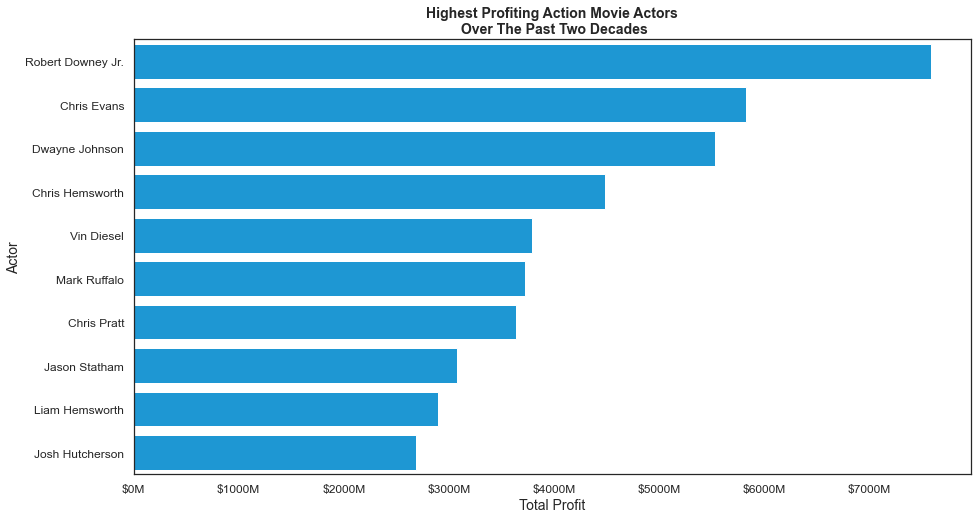

In [80]:
stevenactorfig, ax = plt.subplots(figsize=(15,8))
sns.barplot(y = top10actors.index, x = top10actors['total_profit'], color='#00a1f1')

ax.set_title('Highest Profiting Action Movie Actors\n Over The Past Two Decades',fontsize= 14,weight=900)
ax.set_xlabel('Total Profit',fontsize= 14)
ax.set_ylabel('Actor',fontsize= 14)
formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

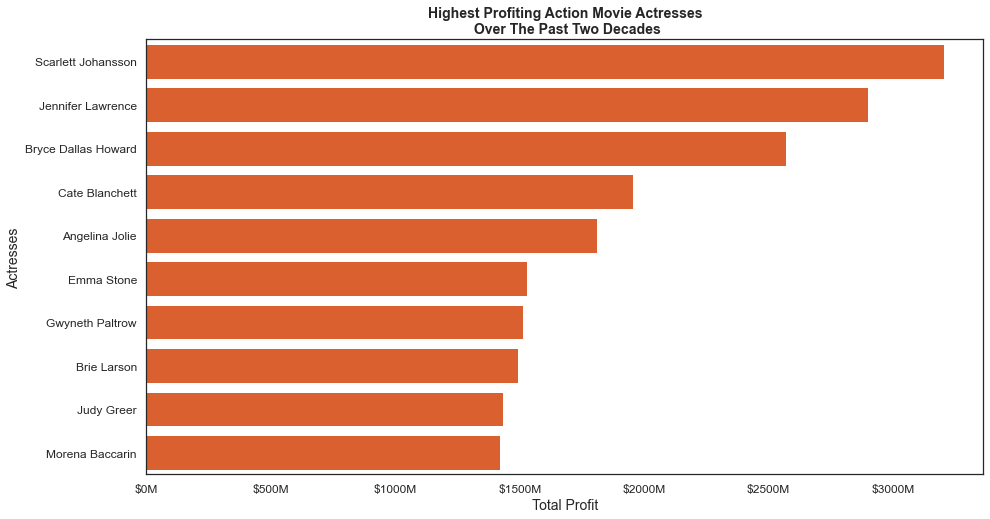

In [81]:
stevenactressfig, ax = plt.subplots(figsize=(15,8))
sns.barplot(y = top10actresses.index, x = top10actresses['total_profit'], color='#f65314')

ax.set_title('Highest Profiting Action Movie Actresses\n Over The Past Two Decades',fontsize= 14,weight=900)
ax.set_xlabel('Total Profit',fontsize= 14)
ax.set_ylabel('Actresses',fontsize= 14)
formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

### 2.5 Recommendation

Just from a cursory glance one can tell that the most profitable action movies are dominated by the Marvel franchises. It is our suggestion that if Microsoft wants to be able to compete in this very saturated market, and earn these incredible billion dollar profits, then they will need to focus on contacting some of these large genre defining names who've historically yielded high box office revenues to develop thier IPs so that they can compete with such behemoth studios.

## Topic 3: Keeping Up with the Competition
In this section, we analyze numbers from other studios. We learn that the top 2 competing studios with the highest revenues (Buena Vista/Disney, Warner Bros) own Marvel and DC comics, respectively. Perhaps a comparable franchise could be fashioned from high-grossing Microsoft games (Halo, Gears of War, Forza Motorsport, etc.)?
***

### 3.1 Data Import
Look for dataset that includes studio name, total gross, foreign & domestic gross and import it

In [24]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:
grossdf = pd.read_csv('./data/zippedData/bom.movie_gross.csv.gz')
grossdf

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


### 3.2 Data Cleaning and Filtering
We have to start by cleaning up null values, converting data types if needed to make sorting work. We created a new "gross_total" column for the analysis and visualization. Last we created a Top 50 list sorted by studios for analysis.

In [26]:
grossdf.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [27]:
grossdf.shape

(3387, 5)

In [28]:
#this shows there are no missing values bc of nonnull
#may have to convert some dtypes tho for sorting
grossdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [29]:
grossdf.foreign_gross = grossdf.foreign_gross.str.replace(",","")
grossdf.foreign_gross

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382          NaN
3383          NaN
3384          NaN
3385          NaN
3386          NaN
Name: foreign_gross, Length: 3387, dtype: object

In [30]:
#get rid of all NaN values
grossdf.foreign_gross = grossdf.foreign_gross.fillna(0)
grossdf.foreign_gross

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382            0
3383            0
3384            0
3385            0
3386            0
Name: foreign_gross, Length: 3387, dtype: object

In [31]:
#convert object to float
grossdf.foreign_gross = grossdf.foreign_gross.astype(float)
grossdf.foreign_gross

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            0.0
3383            0.0
3384            0.0
3385            0.0
3386            0.0
Name: foreign_gross, Length: 3387, dtype: float64

In [32]:
#make a new column called gross_total
gross_total = grossdf.domestic_gross + grossdf.foreign_gross
gross_total

0       1.067000e+09
1       1.025500e+09
2       9.603000e+08
3       8.283000e+08
4       7.526000e+08
            ...     
3382    6.200000e+03
3383    4.800000e+03
3384    2.500000e+03
3385    2.400000e+03
3386    1.700000e+03
Length: 3387, dtype: float64

In [33]:
grossdf

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018
3384,El Pacto,Sony,2500.0,0.0,2018
3385,The Swan,Synergetic,2400.0,0.0,2018


In [34]:
#start cleaning data
#take only relevant topics for your analysis, drop title and year
#add new column, total gross
top_50 = {"studio" : grossdf["studio"],
                    "domestic_gross" : grossdf["domestic_gross"],
                    "foreign_gross" : grossdf["foreign_gross"],
                    "gross_total" : gross_total}
top_50 = pd.DataFrame(top_50)
top_50

,studio,domestic_gross,foreign_gross,gross_total
0,BV,415000000.0,652000000.0,1.067000e+09
1,BV,334200000.0,691300000.0,1.025500e+09
2,WB,296000000.0,664300000.0,9.603000e+08
3,WB,292600000.0,535700000.0,8.283000e+08
4,P/DW,238700000.0,513900000.0,7.526000e+08
...,...,...,...,...
3382,Magn.,6200.0,0.0,6.200000e+03
3383,FM,4800.0,0.0,4.800000e+03
3384,Sony,2500.0,0.0,2.500000e+03
3385,Synergetic,2400.0,0.0,2.400000e+03


In [35]:
#drop na values to clean some rows
top_50 = top_50.dropna(axis=0, how='any', thresh=None, subset=["studio"], inplace=False)
top_50

,studio,domestic_gross,foreign_gross,gross_total
0,BV,415000000.0,652000000.0,1.067000e+09
1,BV,334200000.0,691300000.0,1.025500e+09
2,WB,296000000.0,664300000.0,9.603000e+08
3,WB,292600000.0,535700000.0,8.283000e+08
4,P/DW,238700000.0,513900000.0,7.526000e+08
...,...,...,...,...
3382,Magn.,6200.0,0.0,6.200000e+03
3383,FM,4800.0,0.0,4.800000e+03
3384,Sony,2500.0,0.0,2.500000e+03
3385,Synergetic,2400.0,0.0,2.400000e+03


In [36]:
top_50['studio'].value_counts()

IFC             166
Uni.            147
WB              140
Magn.           136
Fox             136
               ... 
BSC               1
IW                1
Conglomerate      1
Triu              1
Spanglish         1
Name: studio, Length: 257, dtype: int64

### 3.3 Data Analysis and Calculations
We filter the new list down even more by highest grossing studios out of the top 50. Then we filtered down to two more tables of domestic gross vs studio and foreign gross vs studio.

In [37]:
#group domestic + foreign together so you can ascend both at same time
t_top_50 = top_50.sort_values("gross_total", ascending=False).head(50)
t_top_50

,studio,domestic_gross,foreign_gross,gross_total
727,BV,623400000.0,895500000.0,1.518900e+09
1875,BV,459000000.0,946400000.0,1.405400e+09
3080,BV,700100000.0,646900000.0,1.347000e+09
328,WB,381000000.0,960500000.0,1.341500e+09
2758,BV,620200000.0,712400000.0,1.332600e+09
3081,Uni.,417700000.0,891800000.0,1.309500e+09
1127,BV,400700000.0,875700000.0,1.276400e+09
2759,BV,504000000.0,759500000.0,1.263500e+09
3082,BV,608600000.0,634200000.0,1.242800e+09
1128,BV,409000000.0,805800000.0,1.214800e+09


In [38]:
t_top_50.describe()

,domestic_gross,foreign_gross,gross_total
count,5.000000e+01,5.000000e+01,5.000000e+01
mean,3.656120e+08,6.643880e+08,1.030000e+09
std,1.528027e+08,1.656287e+08,1.823695e+08
min,2.700000e+06,1.131600e+03,7.949000e+08
25%,2.715250e+08,5.489000e+08,8.741500e+08
50%,3.468500e+08,6.724500e+08,9.959500e+08
75%,4.144000e+08,7.711000e+08,1.141800e+09
max,9.367000e+08,9.605000e+08,1.518900e+09


In [39]:
#made a groupby to sort total gross by studios to come up with a specific number for each studio in top 50
#also do this twice for the second graph for domestic + foreign gross
studiosum = t_top_50.groupby(["studio"])[["gross_total"]].sum().sort_values(by="gross_total", ascending = False)
studiosum

,gross_total
studio,
BV,2.408190e+10
WB,7.872400e+09
Uni.,5.350000e+09
Sony,4.686600e+09
WB (NL),2.935500e+09
Fox,1.780800e+09
P/DW,1.123800e+09
Par.,1.104000e+09
HC,8.703000e+08


In [40]:
domesticsum = t_top_50.groupby(["studio"])[["domestic_gross"]].sum()
domesticsum

,domestic_gross
studio,
BV,9.827600e+09
Fox,3.777000e+08
HC,2.700000e+06
LG/S,2.923000e+08
LGF,4.247000e+08
P/DW,3.524000e+08
Par.,2.454000e+08
Sony,1.456700e+09
Uni.,1.754800e+09


In [41]:
foreignsum = t_top_50.groupby(["studio"])[["foreign_gross"]].sum()
foreignsum

,foreign_gross
studio,
BV,1.425430e+10
Fox,1.403100e+09
HC,8.676000e+08
LG/S,5.374000e+08
LGF,4.403000e+08
P/DW,7.714000e+08
Par.,8.586000e+08
Sony,3.229900e+09
Uni.,3.595200e+09


In [42]:
#have made 2 seperate tables of foreign and domestic gross by studio
#converted foreign_gross column to float type instead of object for sorting purposes

### 3.4 Data Visualization
We plot each studio based on how much total box office they made in the top 50. Another bar graph compared the breakdown between foreign and domestic gross of each studio in the top 50 to see if there was any correlation between them.

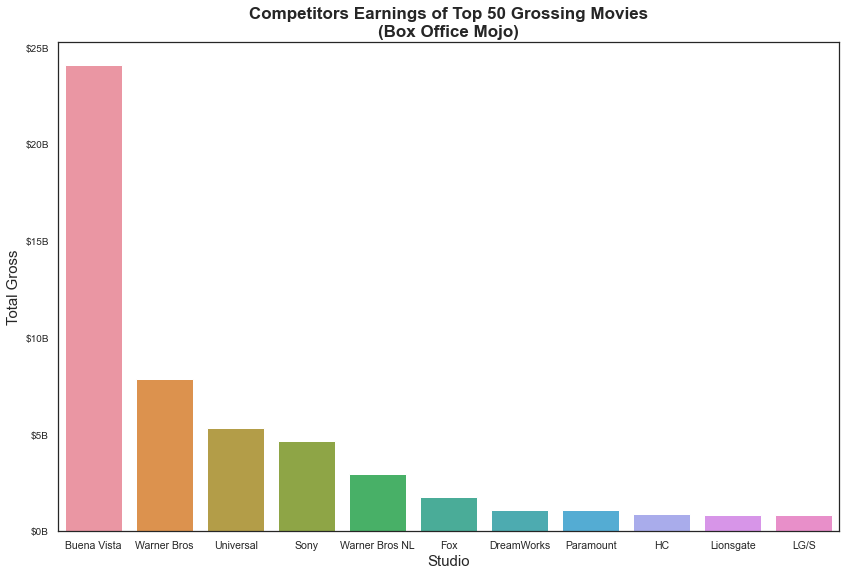

In [83]:
#changed millions from billions in custom ticker, adjust the le-# to one that matches with my totals.
#increase size of graph, titles, labels, and tickers
#make it in descending order so you can easily it more clearly
from matplotlib.ticker import FuncFormatter

studio_labels = ['Buena Vista', 'Warner Bros', 'Universal', 'Sony', 'Warner Bros NL', 'Fox', 'DreamWorks', 'Paramount', 'HC', 'Lionsgate', 'LG/S']
x_sume = np.arange(len(studio_labels))
def billions(y, pos):
    return '$%1.0fB' % (y*1e-9)
sumedhstudiofig, ax = plt.subplots(figsize=(14,9))
sns.barplot(x = studiosum.index, y = studiosum['gross_total'])
sns.color_palette("cubehelix", as_cmap=True)


formatter = FuncFormatter(billions)
ax.yaxis.set_major_formatter(formatter)

ax.set_title('Competitors Earnings of Top 50 Grossing Movies\n(Box Office Mojo)', fontsize=17, weight=950)
ax.set_xlabel('Studio', fontsize=15)
ax.set_ylabel('Total Gross', fontsize=15)
ax.set_xticks(x_sume)
ax.set_xticklabels(studio_labels, size=13)
plt.xticks(fontsize=10.5)
plt.yticks(fontsize=10);

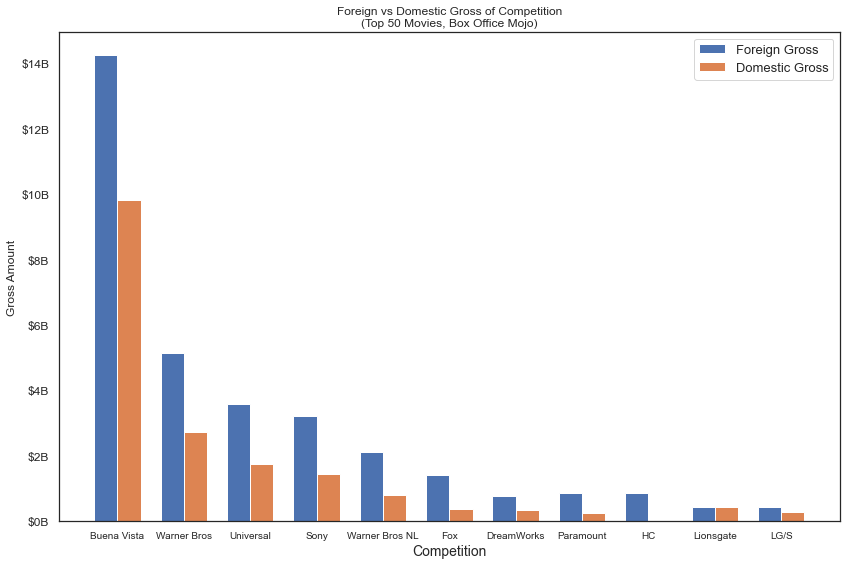

In [85]:
#do a double bar chart for domestic vs foreign total sales for each studio in top 50 movies

studio_labels = ['Buena Vista', 'Warner Bros', 'Universal', 'Sony', 'Warner Bros NL', 'Fox', 'DreamWorks', 'Paramount', 'HC', 'Lionsgate', 'LG/S']
foreignsum = [1.425430e+10, 5.142600e+09, 3.595200e+09, 3.229900e+09, 2.119000e+09, 1.403100e+09, 7.714000e+08, 8.586000e+08, 8.676000e+08, 4.403000e+08, 4.403000e+08]
domesticsum = [9.827600e+09, 2.729800e+09, 1.754800e+09, 1.456700e+09, 8.165000e+08, 3.777000e+08, 3.524000e+08, 2.454000e+08,  2.700000e+06, 4.247000e+08, 2.923000e+08]

x_sume = np.arange(len(studio_labels))
width_sum = 0.35
def billions(y, pos):
    return '$%1.0fB' % (y*1e-9)
formatter = FuncFormatter(billions)


fvsdfig, ax = plt.subplots(figsize=(14,9))
rects1_sum = ax.bar(x_sume - width_sum/2, foreignsum, width_sum, label='Foreign Gross')
rects2_sum = ax.bar(x_sume + width_sum/2, domesticsum, width_sum, label='Domestic Gross')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('Competition', size=14)
ax.set_ylabel('Gross Amount')
ax.set_title('Foreign vs Domestic Gross of Competition\n(Top 50 Movies, Box Office Mojo)')
ax.set_xticks(x_sume)
ax.set_xticklabels(studio_labels, size=10)
ax.legend()
plt.rc('legend', fontsize=13)
plt.yticks(fontsize=12)

plt.show()

### 3.5 Recommendations
Based on these results, the top two earners are Buena Vista (Disney) & Warner Bros. These two studios are home to the biggest comic book franchises, Marvel & DC which is a reason why they're so sucessfull internationally and domestically. Our suggestion for Microsoft would be to see these company models and to look into converting their own video game exclusives such as Halo, Gears of War and Forza Motorsport into movies to potentially reach the same succcess as their competitors.

## Topic 4: Seasonality
In this section, we analyze datasets to determine if releasing movies during a specific month or time of year has an impact on profits.
***

### 4.1 Data Import
Imported a table that contained costs 'production_budget' and revenue 'worldwide gross'

In [45]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [46]:
# Create variable & open
movie_budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


### 4.2 Data Cleaning and Filtering
Once we get the data types from 'movie_budgets' we notice that they are objects instead of ints or floats in order to make calculations. Also, we have to remove commas and dollars signs from the dataframes.

In [47]:
# Basic info about the movie_budgets file
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [48]:
# Change budget, domestic gross & worldwide gross columns data types
# Remove comma
production_budget = movie_budgets.production_budget.str.replace(",", "")
domestic_gross = movie_budgets.domestic_gross.str.replace(",", "")
worldwide_gross = movie_budgets.worldwide_gross.str.replace(",", "")
production_budget
domestic_gross
worldwide_gross

0       $2776345279
1       $1045663875
2        $149762350
3       $1403013963
4       $1316721747
           ...     
5777             $0
5778        $240495
5779          $1338
5780             $0
5781        $181041
Name: worldwide_gross, Length: 5782, dtype: object

In [49]:
# Now remove dollar sign
production_budget = production_budget.str.replace("$", "")
domestic_gross = domestic_gross.str.replace("$", "")
worldwide_gross = worldwide_gross.str.replace("$", "")
production_budget
domestic_gross
worldwide_gross

0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: worldwide_gross, Length: 5782, dtype: object

In [50]:
# Change data type from object to float
production_budget = production_budget.astype(float)
domestic_gross = domestic_gross.astype(float)
worldwide_gross = worldwide_gross.astype(float)
production_budget
domestic_gross
worldwide_gross

0       2.776345e+09
1       1.045664e+09
2       1.497624e+08
3       1.403014e+09
4       1.316722e+09
            ...     
5777    0.000000e+00
5778    2.404950e+05
5779    1.338000e+03
5780    0.000000e+00
5781    1.810410e+05
Name: worldwide_gross, Length: 5782, dtype: float64

### 4.3 Data Analysis and Calculations
Calculate foreign and domestic total gross sums. Calculate profits by month.

In [51]:
# Calculate total_gross
total_gross = domestic_gross + worldwide_gross
total_gross

0       3.536853e+09
1       1.286728e+09
2       1.925247e+08
3       1.862020e+09
4       1.936903e+09
            ...     
5777    0.000000e+00
5778    2.889770e+05
5779    2.676000e+03
5780    0.000000e+00
5781    3.620820e+05
Length: 5782, dtype: float64

In [52]:
# Calculate movie_profit
movie_profit = total_gross - production_budget
movie_profit

0       3.111853e+09
1       8.761278e+08
2      -1.574753e+08
3       1.531420e+09
4       1.619903e+09
            ...     
5777   -7.000000e+03
5778    2.829770e+05
5779   -2.324000e+03
5780   -1.400000e+03
5781    3.609820e+05
Length: 5782, dtype: float64

In [53]:
# Create movie_budget dataframe 
movie_budget = {"original_title" : movie_budgets["movie"],
                "release_date" : movie_budgets['release_date'],
                "total_gross" : total_gross,
                "movie_profit" : movie_profit}
df_movie_budget = pd.DataFrame(movie_budget)
df_movie_budget

,original_title,release_date,total_gross,movie_profit
0,Avatar,"Dec 18, 2009",3.536853e+09,3.111853e+09
1,Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",1.286728e+09,8.761278e+08
2,Dark Phoenix,"Jun 7, 2019",1.925247e+08,-1.574753e+08
3,Avengers: Age of Ultron,"May 1, 2015",1.862020e+09,1.531420e+09
4,Star Wars Ep. VIII: The Last Jedi,"Dec 15, 2017",1.936903e+09,1.619903e+09
...,...,...,...,...
5777,Red 11,"Dec 31, 2018",0.000000e+00,-7.000000e+03
5778,Following,"Apr 2, 1999",2.889770e+05,2.829770e+05
5779,Return to the Land of Wonders,"Jul 13, 2005",2.676000e+03,-2.324000e+03
5780,A Plague So Pleasant,"Sep 29, 2015",0.000000e+00,-1.400000e+03


In [54]:
# revisit movie_budgets
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [55]:
# Convert the release_date field to type datetime object
df_movie_budget['release_date'] = pd.to_datetime(df_movie_budget['release_date'])

In [56]:
# Add new column called release_month with only the month from the release_date
month =  [x.strftime('%B') for x in df_movie_budget['release_date']]
df_movie_budget['release_month'] = month

In [57]:
# Caclulate profit by month
profit_vs_monthsum = df_movie_budget.groupby('release_month', sort=False, as_index=True)['movie_profit'].sum()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
profit_vs_monthsum = profit_vs_monthsum.reindex(new_order, axis=0).reset_index()
profit_vs_monthsum

,release_month,movie_profit
0,January,1.723547e+10
1,February,3.093380e+10
2,March,4.155941e+10
3,April,2.880441e+10
4,May,7.400512e+10
5,June,7.915562e+10
6,July,7.002402e+10
7,August,3.352490e+10
8,September,2.367912e+10
9,October,3.065286e+10


In [58]:
profit_vs_monthmean = df_movie_budget.groupby('release_month', sort=False, as_index=True)['movie_profit'].mean()
profit_vs_monthmean = profit_vs_monthmean.reindex(new_order, axis=0).reset_index()
profit_vs_monthmean

,release_month,movie_profit
0,January,4.966995e+07
1,February,7.891276e+07
2,March,8.842428e+07
3,April,6.344583e+07
4,May,1.818308e+08
5,June,1.652518e+08
6,July,1.591455e+08
7,August,6.759052e+07
8,September,4.803067e+07
9,October,5.349540e+07


In [59]:
# profit_vs_month['release_month'] = pd.Categorical(profit_vs_month['release_month'], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
# profit_by_month

In [60]:
# Next Analysis 
foreign_gross = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
foreign_gross

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [61]:
# Repeat steps- find out basic info about the foreign_gross file
foreign_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [62]:
# Change budget, domestic gross, and worldwide gross columns data types
# Remove the comma
production_budget = foreign_gross.production_budget.str.replace(",", "")
domestic_gross = foreign_gross.domestic_gross.str.replace(",", "")
worldwide_gross = foreign_gross.worldwide_gross.str.replace(",", "")
production_budget
domestic_gross
worldwide_gross

0       $2776345279
1       $1045663875
2        $149762350
3       $1403013963
4       $1316721747
           ...     
5777             $0
5778        $240495
5779          $1338
5780             $0
5781        $181041
Name: worldwide_gross, Length: 5782, dtype: object

In [63]:
# Remove the dollar sign
production_budget = production_budget.str.replace("$", "")
domestic_gross = domestic_gross.str.replace("$", "")
worldwide_gross = worldwide_gross.str.replace("$", "")
production_budget
domestic_gross
worldwide_gross

0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: worldwide_gross, Length: 5782, dtype: object

In [64]:
# change data type from object to float
production_budget = production_budget.astype(float)
domestic_gross = domestic_gross.astype(float)
worldwide_gross = worldwide_gross.astype(float)
production_budget
domestic_gross
worldwide_gross

0       2.776345e+09
1       1.045664e+09
2       1.497624e+08
3       1.403014e+09
4       1.316722e+09
            ...     
5777    0.000000e+00
5778    2.404950e+05
5779    1.338000e+03
5780    0.000000e+00
5781    1.810410e+05
Name: worldwide_gross, Length: 5782, dtype: float64

In [65]:
# calculate foreign_gross
foreign_gross_calc = worldwide_gross - domestic_gross 
foreign_gross_calc

0       2.015838e+09
1       8.046000e+08
2       1.070000e+08
3       9.440081e+08
4       6.965404e+08
            ...     
5777    0.000000e+00
5778    1.920130e+05
5779    0.000000e+00
5780    0.000000e+00
5781    0.000000e+00
Length: 5782, dtype: float64

In [66]:
# create foreign_gross dataframe 
foreign_gross = {"original_title" : foreign_gross["movie"],
                "release_date" : foreign_gross['release_date'],
                "foreign_gross" : foreign_gross_calc,
                "domestic_gross" : domestic_gross}
df_foreign_gross = pd.DataFrame(foreign_gross)
df_foreign_gross

,original_title,release_date,foreign_gross,domestic_gross
0,Avatar,"Dec 18, 2009",2.015838e+09,760507625.0
1,Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",8.046000e+08,241063875.0
2,Dark Phoenix,"Jun 7, 2019",1.070000e+08,42762350.0
3,Avengers: Age of Ultron,"May 1, 2015",9.440081e+08,459005868.0
4,Star Wars Ep. VIII: The Last Jedi,"Dec 15, 2017",6.965404e+08,620181382.0
...,...,...,...,...
5777,Red 11,"Dec 31, 2018",0.000000e+00,0.0
5778,Following,"Apr 2, 1999",1.920130e+05,48482.0
5779,Return to the Land of Wonders,"Jul 13, 2005",0.000000e+00,1338.0
5780,A Plague So Pleasant,"Sep 29, 2015",0.000000e+00,0.0


In [67]:
# Group FG & DG by months
# Caclulate profit by month
df_foreign_gross['release_date'] = pd.to_datetime(df_foreign_gross['release_date'])
df_foreign_gross

,original_title,release_date,foreign_gross,domestic_gross
0,Avatar,2009-12-18,2.015838e+09,760507625.0
1,Pirates of the Caribbean: On Stranger Tides,2011-05-20,8.046000e+08,241063875.0
2,Dark Phoenix,2019-06-07,1.070000e+08,42762350.0
3,Avengers: Age of Ultron,2015-05-01,9.440081e+08,459005868.0
4,Star Wars Ep. VIII: The Last Jedi,2017-12-15,6.965404e+08,620181382.0
...,...,...,...,...
5777,Red 11,2018-12-31,0.000000e+00,0.0
5778,Following,1999-04-02,1.920130e+05,48482.0
5779,Return to the Land of Wonders,2005-07-13,0.000000e+00,1338.0
5780,A Plague So Pleasant,2015-09-29,0.000000e+00,0.0


In [68]:
month =  [x.strftime('%B') for x in df_foreign_gross['release_date']]
df_foreign_gross['release_month'] = month

In [69]:
fg_vs_month = df_foreign_gross.groupby('release_month', as_index=False)[['foreign_gross','domestic_gross']].sum().sort_values(by='foreign_gross', ascending=False)
fg_vs_month

,release_month,foreign_gross,domestic_gross
2,December,4.141630e+10,3.434511e+10
8,May,3.889701e+10,2.714607e+10
9,November,3.769438e+10,2.827605e+10
6,June,3.673696e+10,3.153157e+10
5,July,3.530365e+10,2.672034e+10
7,March,1.976838e+10,1.812930e+10
0,April,1.479670e+10,1.240709e+10
10,October,1.434853e+10,1.399466e+10
1,August,1.428986e+10,1.595543e+10
3,February,1.416291e+10,1.388254e+10


In [70]:
fg_vs_month['release_month'] = pd.Categorical(fg_vs_month['release_month'], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
fg_by_month = fg_vs_month.sort_values("release_month")
fg_by_month

,release_month,foreign_gross,domestic_gross
4,January,7.847130e+09,8.310517e+09
3,February,1.416291e+10,1.388254e+10
7,March,1.976838e+10,1.812930e+10
0,April,1.479670e+10,1.240709e+10
8,May,3.889701e+10,2.714607e+10
6,June,3.673696e+10,3.153157e+10
5,July,3.530365e+10,2.672034e+10
1,August,1.428986e+10,1.595543e+10
11,September,1.160709e+10,1.141289e+10
10,October,1.434853e+10,1.399466e+10


### 4.4 Data Visualization
Plot 2 bar charts comparing total profit and average profile by month. Plot a 3rd, stacked bar chart that compares foreign vs. domestic gross by month.

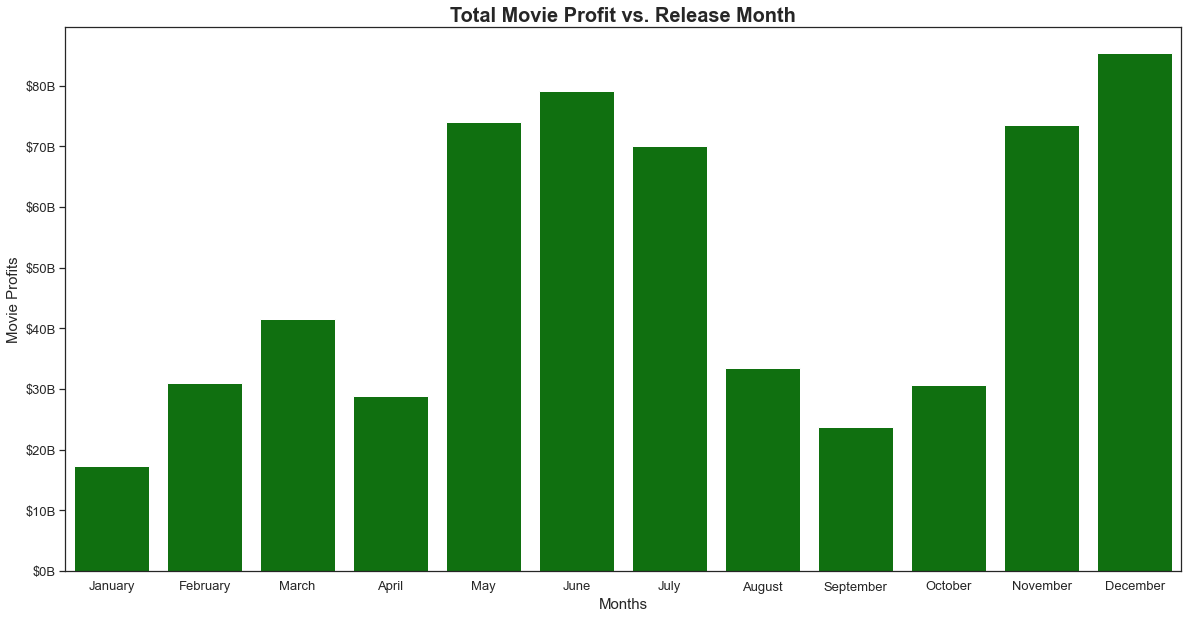

In [87]:
# Plot total profit vs month (bar chart) 
from matplotlib.ticker import FuncFormatter

ordered_months = ['January', 'February', 'March', 'April', 'May',
                 'June', 'July', 'August', 'September', 'October',
                 'November', 'December']
x = np.arange(len(ordered_months))
def ten_billions(y, pos):
    return '$%1.0fB' % (y*1e-9)
tot_prof_fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x = profit_vs_monthsum['release_month'],
            y = profit_vs_monthsum['movie_profit'],
            color = 'green')
sns.set_style("white")
plt.title("Total Movie Profit vs. Release Month", fontsize=20, weight=900)
plt.ylabel("Movie Profits", fontsize= 15)
plt.xlabel("Months", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.tick_params(left=True, bottom=False)
formatter = FuncFormatter(ten_billions)
ax.yaxis.set_major_formatter(formatter);

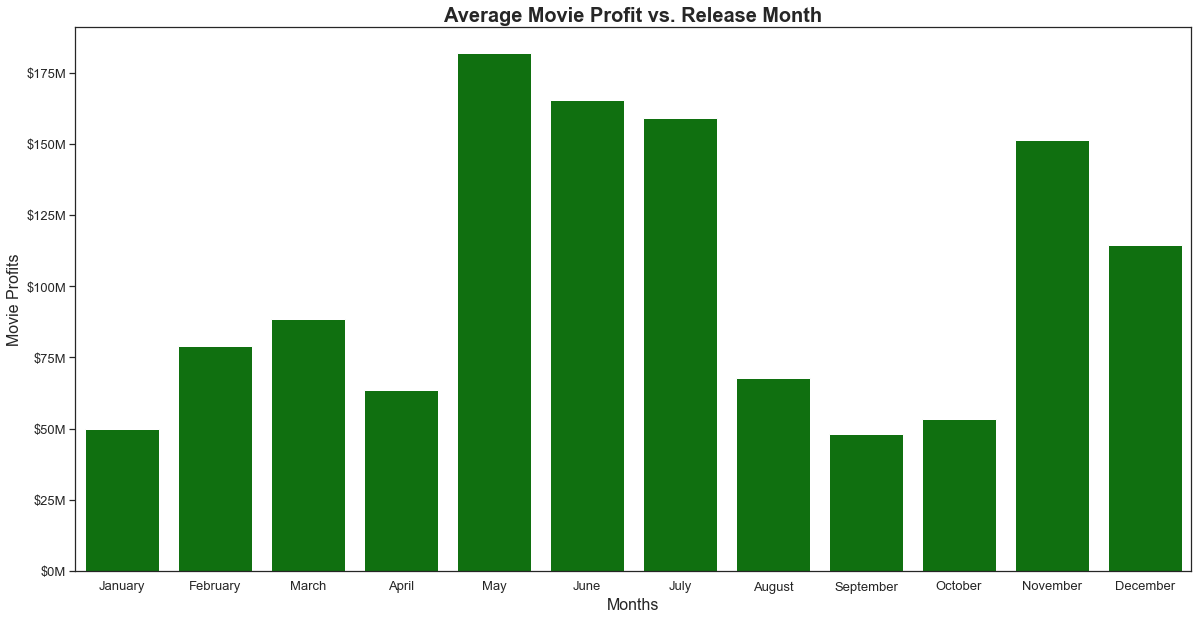

In [89]:
# Plot average profit vs month (bar chart) 
from matplotlib.ticker import FuncFormatter

x = np.arange(len(ordered_months))
def hun_millions(y, pos):
    return '$%1.0fM' % (y*1e-6)
avg_prof_fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x = profit_vs_monthmean['release_month'],
            y = profit_vs_monthmean['movie_profit'],
            color = 'green')
sns.set_style("white")
plt.title("Average Movie Profit vs. Release Month", fontsize=20, weight=900)
plt.ylabel("Movie Profits", fontsize=16)
plt.xlabel("Months", fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.tick_params(left=True, bottom=False)
formatter = FuncFormatter(hun_millions)
ax.yaxis.set_major_formatter(formatter);

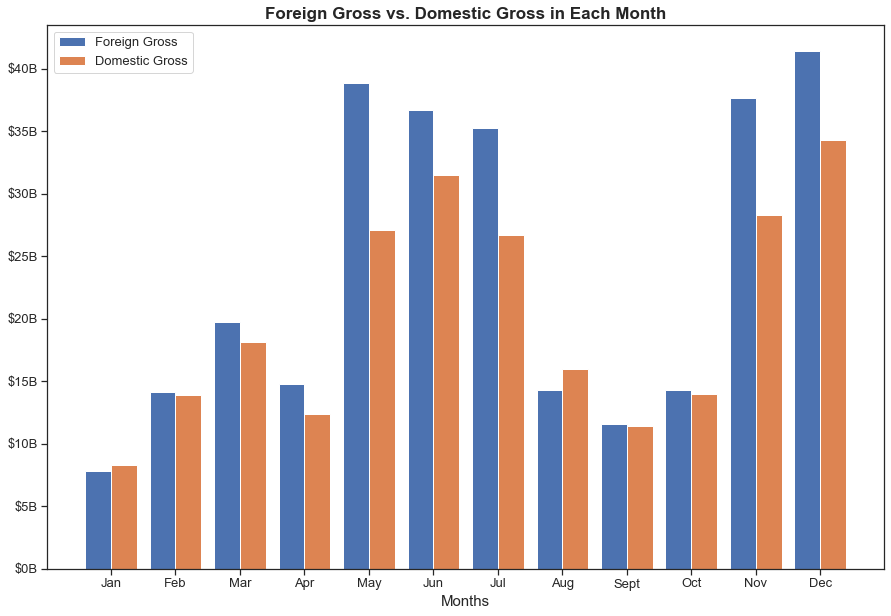

In [91]:
# Replace XFG & ZDG & make double bar chart bigger 
# Add units on ylabel

from matplotlib.ticker import FuncFormatter

X = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
XFG = [7.847130e+09, 1.416291e+10, 1.976838e+10, 1.479670e+10, 3.889701e+10, 3.673696e+10, 
       3.530365e+10, 1.428986e+10, 1.160709e+10, 1.434853e+10, 3.769438e+10, 4.141630e+10]
ZDG = [8.310517e+09, 1.388254e+10, 1.812930e+10, 1.240709e+10, 2.714607e+10, 3.153157e+10, 
       2.672034e+10, 1.595543e+10, 1.141289e+10, 1.399466e+10, 2.827605e+10, 3.434511e+10]

bar_fig, ax = plt.subplots(figsize=(15,10))
X_axis = np.arange(len(X))
def ten_billions(y, pos):
    return '$%1.0fB' % (y*1e-9)
plt.bar(X_axis - 0.2, XFG, 0.4, label = 'Foreign Gross')
plt.bar(X_axis + 0.2, ZDG, 0.4, label = 'Domestic Gross')
sns.set_style("white")
plt.xticks(X_axis, X, fontsize=13)
ax.tick_params(left=True, bottom=True)
plt.xlabel("Months", fontsize=15)
plt.title("Foreign Gross vs. Domestic Gross in Each Month", fontsize=17, weight=900)
plt.legend(fontsize=13)
formatter = FuncFormatter(ten_billions)
ax.yaxis.set_major_formatter(formatter)
plt.yticks(fontsize=13)
plt.show()

### 4.5 Recommendations
Historically speaking, May, June and July yield the highest average profits. We recommended releasing big budget movies in these months. Our analysis shows that if Microsoft targets releases during these summer months there's a higher probability to generate more profit.

# Overall Conclusions
***
Based on our analysis, we make the following suggestions for the business:

* **An early focus should be placed on making horror movies.** According to the data, they historically yield the lowest average cost and highest average profit margins. They'll serve as an initial, lower-risk entry point.
* **When moving into big budget, blockbuster movies, target specific directors and/or actors who've historically yielded high box office revenues.** Top 3 directors: Russo brothers, Joss Whedon, James Wan. Top 3 actors: Robert Downey Jr., Chris Evans, Dwayne 'The Rock' Johnson. Top 3 actresses: Scarlett Johansson, Jennifer Lawrence, Bryce Dallas Howard.
* **Explore creating movie franchises out of Microsoft intellectual property, namely video games.** The top 2 competing studios with the highest revenues (Buena Vista/Disney, Warner Bros) own Marvel and DC comics, respectively. A comparable franchise could be fashioned from high-grossing Microsoft games (Halo, Gears of War, Forza Motorsport, etc.)
* **Release big budget movies in May, June or July.** These 3 months historically yield the highest average revenues.